<a href="https://colab.research.google.com/github/AyeshaAnzerBCIT/Multisource/blob/main/Eyetracking_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install torch-geometric
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.13.0+cu116.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.13.0+cu116.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.2 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp311-cp311-linux_x86_64.whl size=1127935 sha256=c0d0d01ad4c04ee91932479af4ac8e6800806ce3cd286b1529de5d13554b3379
  Stored in directory: /root/.cache/pip/wheels/75/e2/1e/299c596063839303657c211f587f05591891cc6cf126d94d21
Successfully built torch-sparse
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp311-cp311-linux_x86_64.whl size=547369 sha256=412d4777163a2ff6c56b51e69e1e3b2fa6

In [19]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 54.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.12.0 requires numpy<1.29.0,>=1.22.4, but you have numpy 2.2.4 which is incompatible.
gpy 1.13.2 requires numpy<2.0.0,>=1.7, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [12]:
!pip install GPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_pupil_size       951 non-null    float64
 1   std_pupil_size        951 non-null    float64
 2   mean_gaze_x           951 non-null    float64
 3   mean_gaze_y           951 non-null    float64
 4   std_gaze_x            951 non-null    float64
 5   std_gaze_y            951 non-null    float64
 6   head_pos_variability  951 non-null    float64
 7   mean_latency          951 non-null    float64
 8   std_latency           951 non-null    float64
 9   mean_gaze_vector      951 non-null    float64
 10  std_gaze_vector       951 non-null    float64
 11  file_name             951 non-null    object 
dtypes: float64(11), object(1)
memory usage: 89.3+ KB
None

Sample Rows:
   mean_pupil_size  std_pupil_size  mean_gaze_x  mean_gaze_y  std_gaze_x  \
0        13.406438

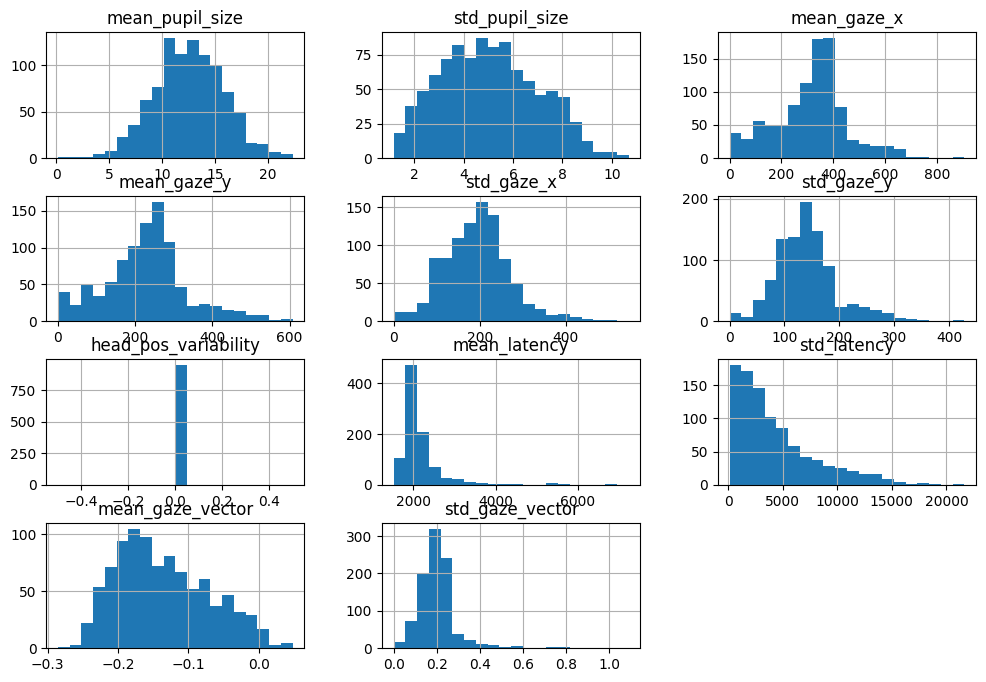

In [6]:
import gcsfs
import pandas as pd
import os

# Set GOOGLE_APPLICATION_CREDENTIALS environment variable
# This assumes your Key.json file is in the current directory
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "Key.json"

# Initialize GCS file system without explicitly passing the token
fs = gcsfs.GCSFileSystem()

# Define the file path in GCS
file_path = "eegchild/processed_asd_features.csv"

# Load the CSV file from GCS
with fs.open(file_path, 'r') as f:
    df = pd.read_csv(f)

# Display basic dataset information
print("Dataset Info:")
print(df.info())

# Show the first few rows
print("\nSample Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Display histograms for numerical features
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(12, 8))
plt.show()


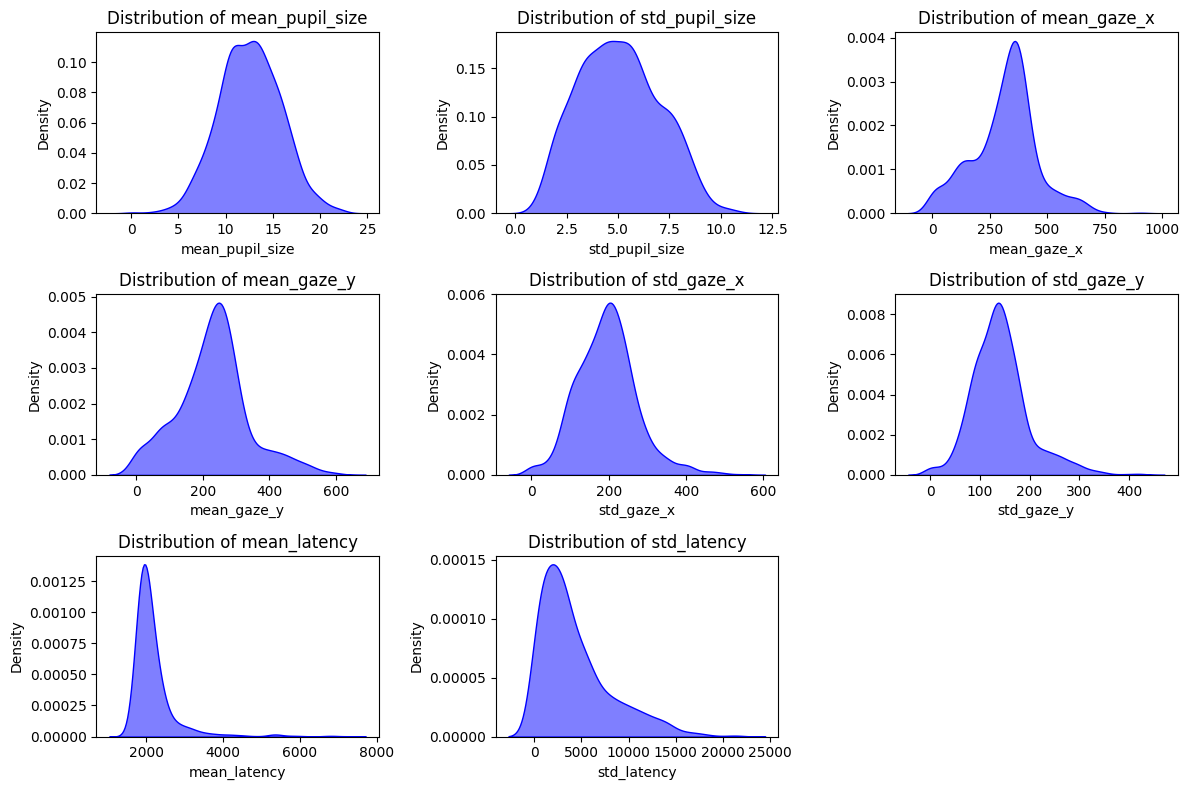

Removed 951 outliers.


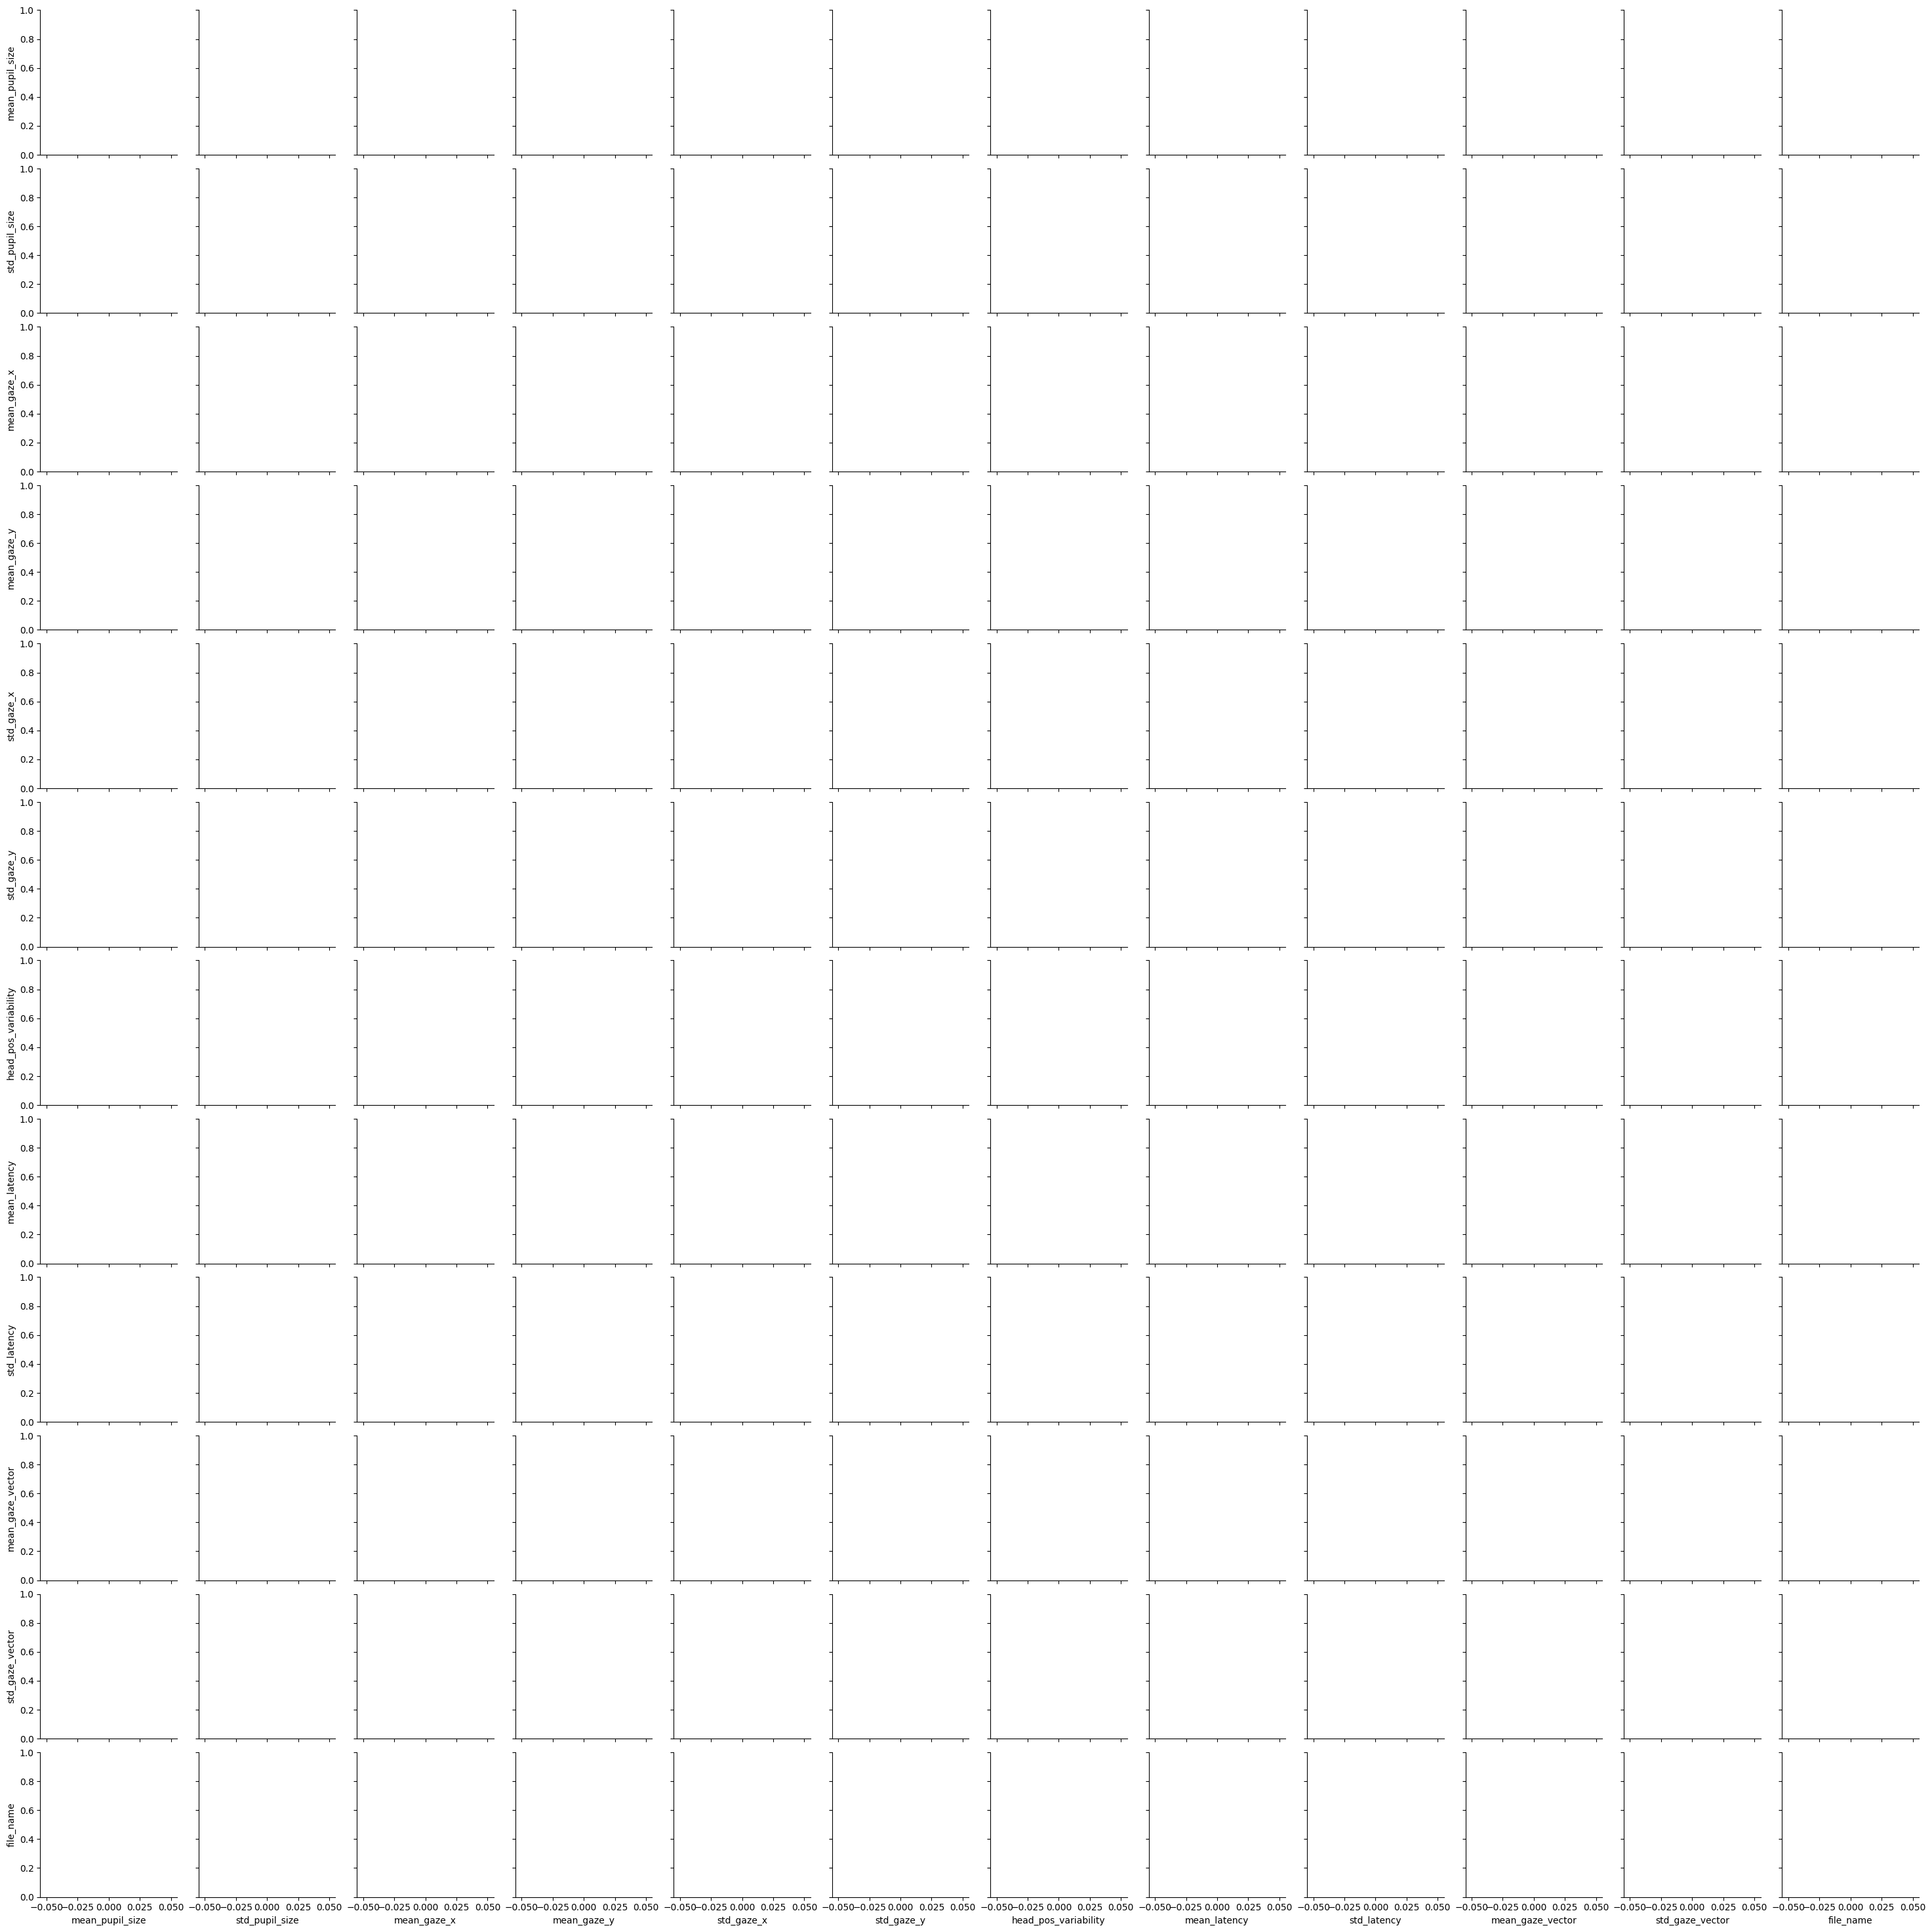

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# -------------------------------
# FEATURE DISTRIBUTIONS
# -------------------------------
def plot_feature_distributions(df):
    """Generates KDE plots for key eye-tracking features."""
    features = ['mean_pupil_size', 'std_pupil_size', 'mean_gaze_x', 'mean_gaze_y',
                'std_gaze_x', 'std_gaze_y', 'mean_latency', 'std_latency']

    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 3, i)
        sns.kdeplot(df[feature], fill=True, alpha=0.5, color='blue')
        plt.title(f"Distribution of {feature}")

    plt.tight_layout()
    plt.show()

plot_feature_distributions(df)

# -------------------------------
# OUTLIER REMOVAL USING Z-SCORE
# -------------------------------
def remove_outliers_zscore(df, threshold=3.0):
    """Removes outliers using Z-score filtering."""
    df_clean = df[(np.abs(zscore(df.select_dtypes(include=[np.number]))) < threshold).all(axis=1)]
    print(f"Removed {len(df) - len(df_clean)} outliers.")
    return df_clean

df_clean = remove_outliers_zscore(df)

# -------------------------------
# PAIRWISE RELATIONSHIPS
# -------------------------------
sns.pairplot(df_clean, diag_kind="kde")
plt.show()


In [21]:
!pip install --upgrade --force-reinstall numpy==1.26.4


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [22]:
!pip install --upgrade --force-reinstall GPy


  Using cached GPy-1.13.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached paramz-0.9.6-py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached GPy-1.13.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 65.1 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached paramz-0.9.6-py3-none-any.whl (103 kB)
Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.2

In [1]:
import numpy as np
import GPy
from GPy.models import GPLVM
print("NumPy version:", np.__version__)
print("GPy version:", GPy.__version__)


NumPy version: 1.26.4
GPy version: 1.13.2


In [5]:
import os
import gcsfs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import GPy
from GPy.models import GPLVM
from sklearn.neighbors import kneighbors_graph

# -------------------------------
# CONFIGURATION
# -------------------------------
KEY_PATH = "Key.json"  # Path to service account JSON key
EYE_TRACKING_FILE = "gs://eegchild/processed_asd_features.csv"
FILE_COLUMN = "file_name"

# -------------------------------
# GCS SETUP
# -------------------------------
fs = gcsfs.GCSFileSystem(token=KEY_PATH)

def load_eye_tracking_data():
    """Loads the eye-tracking dataset from GCS into a DataFrame."""
    try:
        with fs.open(EYE_TRACKING_FILE, 'r') as f:
            df = pd.read_csv(f)
        print(f"Loaded {len(df)} rows from {EYE_TRACKING_FILE}\n")
        return df
    except Exception as e:
        print(f"Error loading {EYE_TRACKING_FILE}: {e}")
        return None

def extract_patientid(df):
    """Extracts patient ID from the FILE_COLUMN."""
    if FILE_COLUMN in df.columns:
        df['patientid'] = df[FILE_COLUMN].apply(lambda x: x.split('_')[0] if '_' in x else x)
        print("\nSample rows with extracted patientid:")
        print(df[[FILE_COLUMN, 'patientid']].head(10))
    return df

def standardize_features(df):
    """Standardizes numeric features for clustering."""
    numeric_df = df.select_dtypes(include=["number"])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(numeric_df)
    return X_scaled, numeric_df

def apply_gplvm(X_scaled, latent_dim=2):
    """Applies Gaussian Process Latent Variable Model (GPLVM) for dimensionality reduction."""
    gplvm = GPLVM(X_scaled, input_dim=latent_dim)  # Initialize GPLVM
    gplvm.optimize()  # Optimize the model
    X_reduced = gplvm.X.values  # Correctly extract latent variables
    return X_reduced

def determine_optimal_k(X_scaled, k_range=range(2, 7)):
    """Determines optimal clusters using the Elbow method & Silhouette Score."""
    inertias = []
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(X_scaled)
        inertias.append(kmeans.inertia_)
        sil_score = silhouette_score(X_scaled, clusters)
        silhouette_scores.append(sil_score)
        print(f"k={k}, Inertia={kmeans.inertia_:.2f}, Silhouette Score={sil_score:.3f}")
    optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
    print(f"Optimal k (based on silhouette score): {optimal_k}")
    return optimal_k

def perform_clustering(df, X_scaled, k):
    """Applies K-Means, Spectral Clustering, and Gaussian Mixture Models (GMM)."""
    df["KMeans_Cluster"] = KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled)
    df["Spectral_Cluster"] = SpectralClustering(n_clusters=k, random_state=42).fit_predict(X_scaled)
    df["GMM_Cluster"] = GaussianMixture(n_components=k, random_state=42).fit_predict(X_scaled)
    return df

# -------------------------------
# GRAPH-BASED CLUSTERING WITH GNN
# -------------------------------
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = torch.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

def build_knn_graph(X_scaled, k=5):
    """Builds a KNN graph from the data."""
    adj_matrix = kneighbors_graph(X_scaled, k, mode='connectivity', include_self=True)
    edge_index = torch.tensor(np.array(adj_matrix.nonzero()), dtype=torch.long)
    return edge_index

def train_gnn(X_scaled, edge_index, hidden_dim=16, output_dim=2, epochs=100):
    """Trains a simple GNN on the graph."""
    X_tensor = torch.tensor(X_scaled, dtype=torch.float)
    model = GNNModel(input_dim=X_scaled.shape[1], hidden_dim=hidden_dim, output_dim=output_dim)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    for epoch in range(epochs):
        optimizer.zero_grad()
        embeddings = model(X_tensor, edge_index)
        loss = torch.mean(embeddings**2)  # Simple unsupervised loss
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch {epoch} | Loss: {loss.item():.4f}")
    return embeddings.detach().numpy()

def hybrid_clustering(embeddings, k):
    """Applies K-Means clustering on GNN embeddings."""
    return KMeans(n_clusters=k, random_state=42).fit_predict(embeddings)

# -------------------------------
# MAIN PIPELINE
# -------------------------------
if __name__ == "__main__":
    df = load_eye_tracking_data()
    if df is None:
        exit("Failed to load data. Exiting.")

    df = extract_patientid(df)
    X_scaled, numeric_df = standardize_features(df)

    # Apply Gaussian Process Latent Variable Model (GPLVM)
    X_reduced = apply_gplvm(X_scaled)

    # Determine optimal k
    optimal_k = determine_optimal_k(X_reduced, k_range=range(2, 7))

    # Perform clustering using K-Means, Spectral, and GMM
    df = perform_clustering(df, X_reduced, k=optimal_k)

    # Train GNN and apply Hybrid clustering (GNN + KMeans)
    edge_index = build_knn_graph(X_scaled)
    embeddings = train_gnn(X_scaled, edge_index)
    df["Hybrid_GNN_KMeans"] = hybrid_clustering(embeddings, optimal_k)

    print("\nFinal Cluster Assignments:")
    print(df[["KMeans_Cluster", "Spectral_Cluster", "GMM_Cluster", "Hybrid_GNN_KMeans"]].head())

    print(" Clustering process completed successfully!")


Loaded 951 rows from gs://eegchild/processed_asd_features.csv


Sample rows with extracted patientid:
                                 file_name  patientid
0  A00051826_SAIIT_2AFC_Block1 Samples.txt  A00051826
1  A00051826_SAIIT_2AFC_Block2 Samples.txt  A00051826
2  A00051826_SAIIT_2AFC_Block3 Samples.txt  A00051826
3    A00051826_SurrSupp_Block2 Samples.txt  A00051826
4     A00051826_WISC_ProcSpeed Samples.txt  A00051826
5          A00051826_vis_learn Samples.txt  A00051826
6  A00051886_SAIIT_2AFC_Block1 Samples.txt  A00051886
7  A00051886_SAIIT_2AFC_Block2 Samples.txt  A00051886
8  A00051886_SAIIT_2AFC_Block3 Samples.txt  A00051886
9    A00051886_SurrSupp_Block1 Samples.txt  A00051886
k=2, Inertia=1478.86, Silhouette Score=0.369
k=3, Inertia=789.55, Silhouette Score=0.456
k=4, Inertia=612.22, Silhouette Score=0.412
k=5, Inertia=467.63, Silhouette Score=0.427
k=6, Inertia=427.40, Silhouette Score=0.383
Optimal k (based on silhouette score): 3
Epoch 0 | Loss: 0.7654
Epoch 10 | Loss: 0.

Loaded 951 rows from gs://eegchild/processed_asd_features.csv


Sample rows with extracted patientid:
                                 file_name  patientid
0  A00051826_SAIIT_2AFC_Block1 Samples.txt  A00051826
1  A00051826_SAIIT_2AFC_Block2 Samples.txt  A00051826
2  A00051826_SAIIT_2AFC_Block3 Samples.txt  A00051826
3    A00051826_SurrSupp_Block2 Samples.txt  A00051826
4     A00051826_WISC_ProcSpeed Samples.txt  A00051826
5          A00051826_vis_learn Samples.txt  A00051826
6  A00051886_SAIIT_2AFC_Block1 Samples.txt  A00051886
7  A00051886_SAIIT_2AFC_Block2 Samples.txt  A00051886
8  A00051886_SAIIT_2AFC_Block3 Samples.txt  A00051886
9    A00051886_SurrSupp_Block1 Samples.txt  A00051886
Epoch 0 | Loss: 0.4739
Epoch 10 | Loss: 0.0751
Epoch 20 | Loss: 0.0348
Epoch 30 | Loss: 0.0160
Epoch 40 | Loss: 0.0094
Epoch 50 | Loss: 0.0066
Epoch 60 | Loss: 0.0051
Epoch 70 | Loss: 0.0041
Epoch 80 | Loss: 0.0034
Epoch 90 | Loss: 0.0029

--- Clustering Performance Comparison ---
                   Sil

PermutationExplainer explainer: 952it [00:19, 23.51it/s]                         


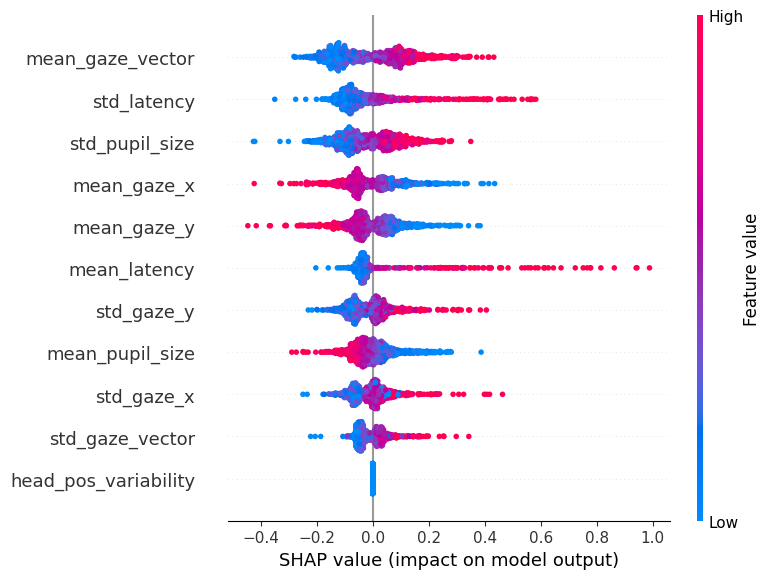

Clustering process completed successfully!


In [10]:
import os
import gcsfs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import kneighbors_graph
import shap

# -------------------------------
# CONFIGURATION
# -------------------------------
KEY_PATH = "Key.json"  # Update to your service account JSON key path
EYE_TRACKING_FILE = "gs://eegchild/processed_asd_features.csv"
FILE_COLUMN = "file_name"
k_fixed = 3  # Standardized number of clusters for consistency

# -------------------------------
# GCS SETUP
# -------------------------------
fs = gcsfs.GCSFileSystem(token=KEY_PATH)

def load_eye_tracking_data():
    """Loads the eye-tracking dataset from GCS into a DataFrame."""
    try:
        with fs.open(EYE_TRACKING_FILE, 'r') as f:
            df = pd.read_csv(f)
        print(f"Loaded {len(df)} rows from {EYE_TRACKING_FILE}\n")
        return df
    except Exception as e:
        print(f"Error loading {EYE_TRACKING_FILE}: {e}")
        return None

def extract_patientid(df):
    """Extracts patient ID from the FILE_COLUMN."""
    if FILE_COLUMN in df.columns:
        df['patientid'] = df[FILE_COLUMN].apply(lambda x: x.split('_')[0] if '_' in x else x)
        print("\nSample rows with extracted patientid:")
        print(df[[FILE_COLUMN, 'patientid']].head(10))
    return df

def standardize_features(df):
    """Standardizes numeric features for clustering."""
    numeric_df = df.select_dtypes(include=["number"])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(numeric_df)
    return X_scaled, numeric_df

def perform_clustering(df, X_scaled, k=k_fixed):
    """Applies K-Means, Spectral Clustering, and Gaussian Mixture Models (GMM)."""
    df["KMeans_Cluster"] = KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled)
    df["Spectral_Cluster"] = SpectralClustering(n_clusters=k, random_state=42).fit_predict(X_scaled)
    df["GMM_Cluster"] = GaussianMixture(n_components=k, random_state=42).fit_predict(X_scaled)
    return df

# -------------------------------
# GRAPH-BASED CLUSTERING WITH GNN
# -------------------------------
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = torch.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

def build_knn_graph(X_scaled, k=5):
    """Builds a KNN graph from the data."""
    adj_matrix = kneighbors_graph(X_scaled, k, mode='connectivity', include_self=True)
    edge_index = torch.tensor(np.array(adj_matrix.nonzero()), dtype=torch.long)
    return edge_index

def train_gnn(X_scaled, edge_index, hidden_dim=16, output_dim=2, epochs=100):
    """Trains a simple GNN on the graph."""
    X_tensor = torch.tensor(X_scaled, dtype=torch.float)
    model = GNNModel(input_dim=X_scaled.shape[1], hidden_dim=hidden_dim, output_dim=output_dim)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    for epoch in range(epochs):
        optimizer.zero_grad()
        embeddings = model(X_tensor, edge_index)
        loss = torch.mean(embeddings**2)  # Simple unsupervised loss
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch {epoch} | Loss: {loss.item():.4f}")
    return embeddings.detach().numpy()

def hybrid_clustering(embeddings, k=k_fixed):
    """Applies K-Means clustering on GNN embeddings."""
    return KMeans(n_clusters=k, random_state=42).fit_predict(embeddings)

def shap_feature_importance(X_scaled, kmeans_model, numeric_features):
    """Computes SHAP feature importance for clustering model."""
    kmeans_model.fit(X_scaled)  # Ensure the model is trained before SHAP
    explainer = shap.Explainer(kmeans_model.predict, X_scaled)
    shap_values = explainer(X_scaled)

    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_scaled, feature_names=numeric_features.columns)

def evaluate_clustering(df, X_scaled):
    """Computes clustering performance metrics."""
    scores = {}
    for method in ["KMeans_Cluster", "Spectral_Cluster", "GMM_Cluster", "Hybrid_GNN_KMeans"]:
        labels = df[method]
        scores[method] = {
            "Silhouette Score": silhouette_score(X_scaled, labels),
            "Davies-Bouldin Index": davies_bouldin_score(X_scaled, labels),
            "Calinski-Harabasz Index": calinski_harabasz_score(X_scaled, labels),
        }
    results_df = pd.DataFrame(scores).T
    print("\n--- Clustering Performance Comparison ---")
    print(results_df)
    return results_df

# -------------------------------
# MAIN PIPELINE
# -------------------------------
if __name__ == "__main__":
    df = load_eye_tracking_data()
    if df is None:
        exit("Failed to load data. Exiting.")

    df = extract_patientid(df)
    X_scaled, numeric_df = standardize_features(df)

    df = perform_clustering(df, X_scaled, k=k_fixed)

    edge_index = build_knn_graph(X_scaled)
    embeddings = train_gnn(X_scaled, edge_index)
    df["Hybrid_GNN_KMeans"] = hybrid_clustering(embeddings, k_fixed)

    evaluate_clustering(df, X_scaled)

    shap_feature_importance(X_scaled, KMeans(n_clusters=k_fixed), numeric_df)

    print("Clustering process completed successfully!")
